Task: Data Classification in the Financial Domain
=======


This notebook is dedicated to a classification problem in the financial domain. We use a dataset (available in the current directory as `moro14_synth.csv`), which is synthesized from the [bank telemarketing dataset](https://www.researchgate.net/publication/260805594_A_Data-Driven_Approach_to_Predict_the_Success_of_Bank_Telemarketing). The detailed description of the included variables (columns) can be found in [UCI repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

The following cells contain code snippets to build a classification pipeline using the above dataset. The main task is to predict the variable `y`, based on the data at hand.

We ask for the candidate to:

- investigate and justify pre-processing steps to be performed on the data;
- correct the implementation (which contains various deliberately problematic aspects) into a proper cross-validation procedure;
- choose and justify evaluation strategies for the given problem.


## Task 1: Data Analysis & Pre-processing

It may be wise to pre-process the data. Please conduct an analysis to investigate what pre-processing you might want to do.

First, load the data using the following code cell:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive')

In [3]:
os.chdir('trustworthy-ml-interview-tasks-main')

In [4]:
import pandas as pd
import numpy as np

# for reproducibility
np.random.seed(2021)

# load data
df = pd.read_csv('moro14_synth.csv', index_col=0)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,59,management,married,basic.4y,no,yes,no,cellular,jul,thu,131,2,803,1,failure,-1.847016,93.745716,-38.927050,0.754158,5005.286336,no
1,31,retired,single,unknown,unknown,yes,no,cellular,sep,thu,236,1,176,1,nonexistent,-1.100000,95.292459,-51.776320,1.032883,4937.510321,yes
2,40,technician,married,unknown,no,no,no,cellular,may,thu,119,2,388,0,failure,-2.298428,93.555591,-36.690548,0.676514,5012.806379,no
3,23,technician,unknown,high.school,no,no,no,cellular,jul,tue,291,1,263,1,nonexistent,-1.121356,94.139250,-36.966172,0.723016,4982.975549,yes
4,34,admin.,single,university.degree,no,no,no,cellular,nov,thu,464,4,262,3,failure,-1.102507,94.907967,-51.647898,1.003647,4962.935669,yes


In [ ]:
!pip install autoviz

In [9]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (3000, 22)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    21 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables

################ Binary_Classification VISUALIZATION Started #####################


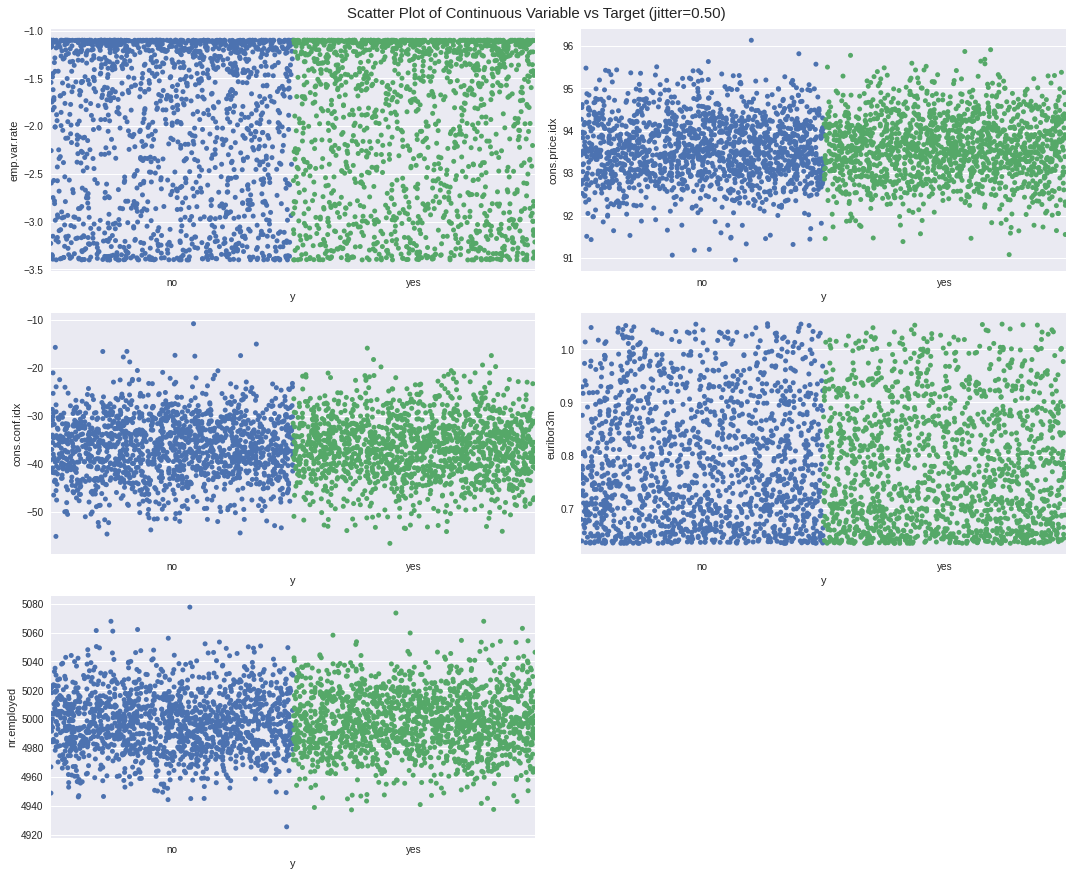

Total Number of Scatter Plots = 15


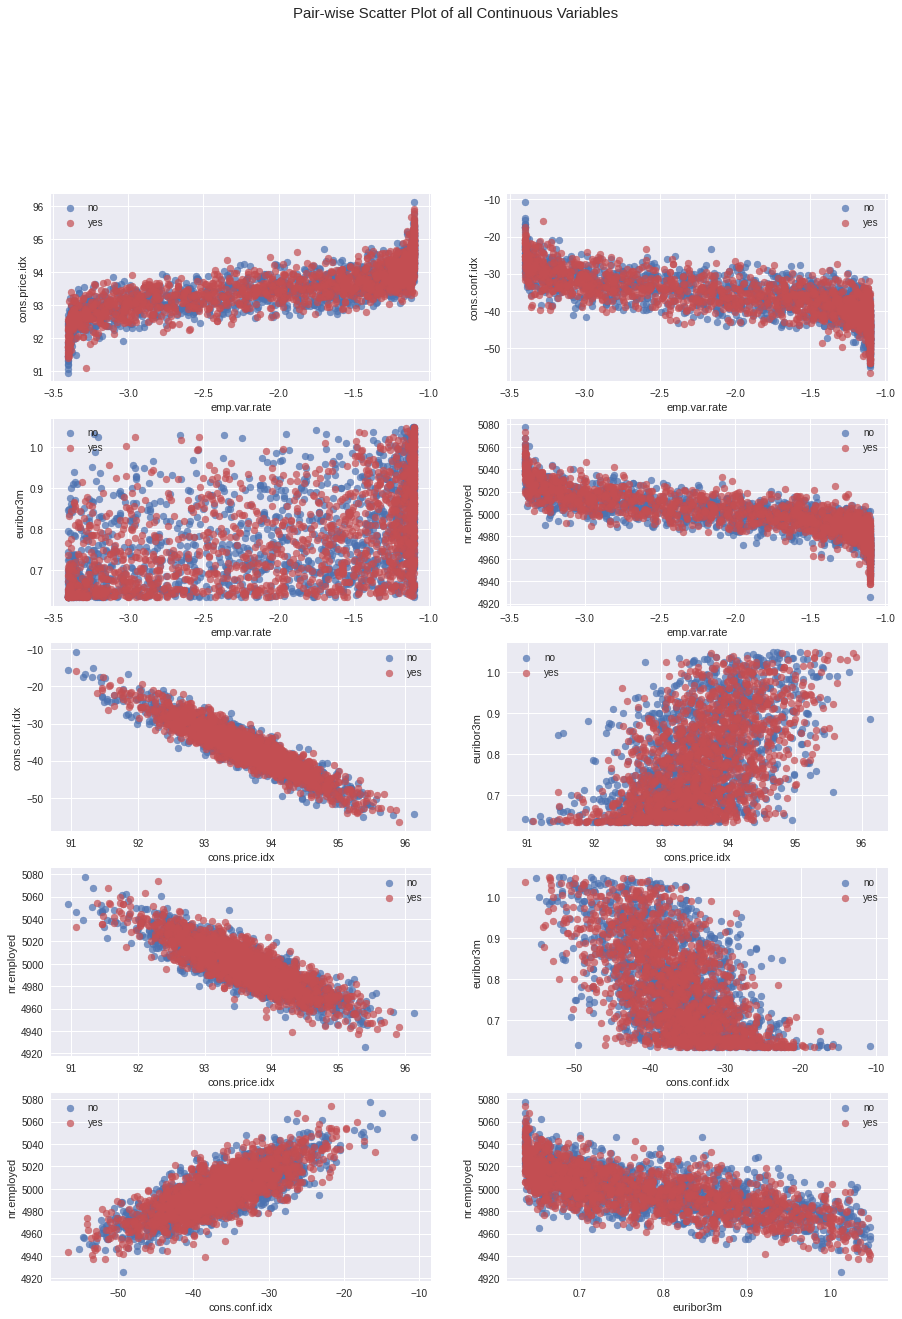

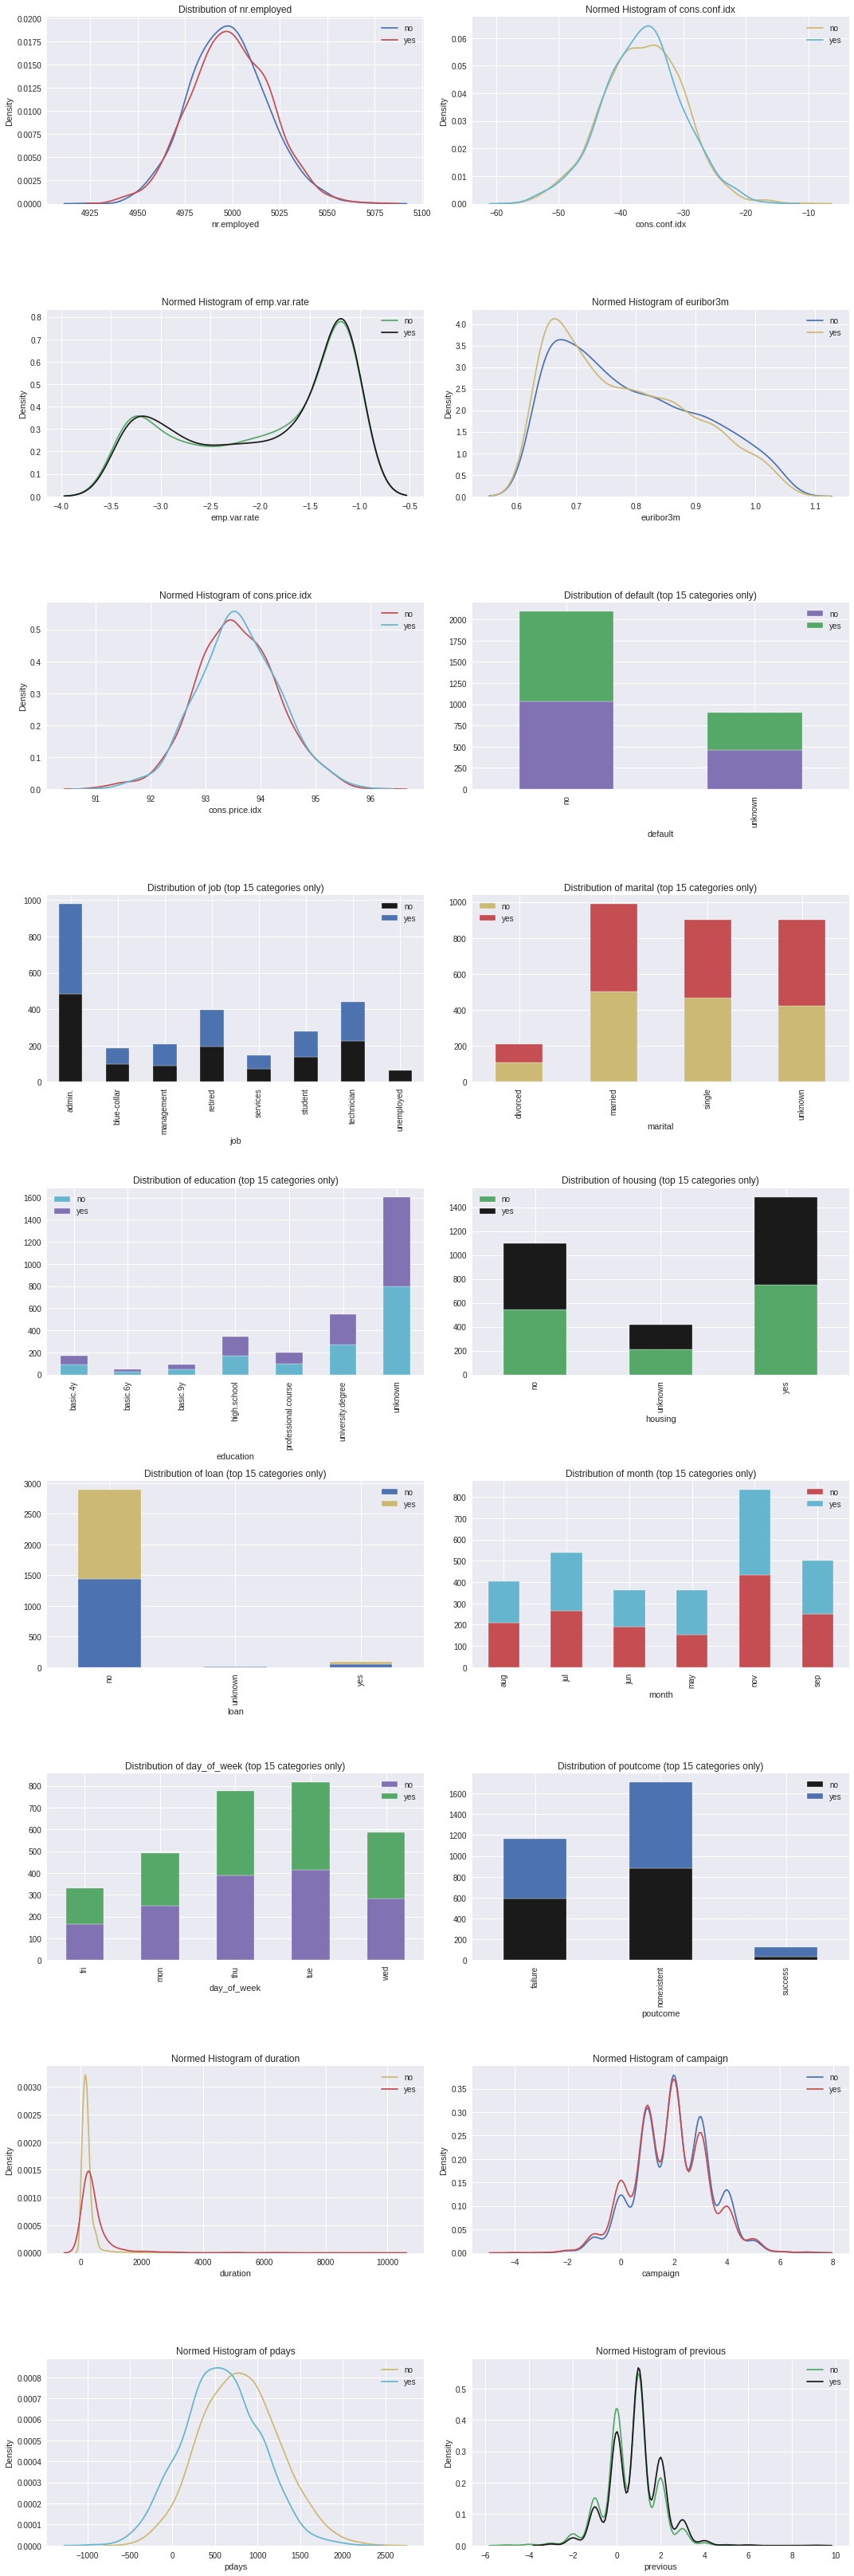

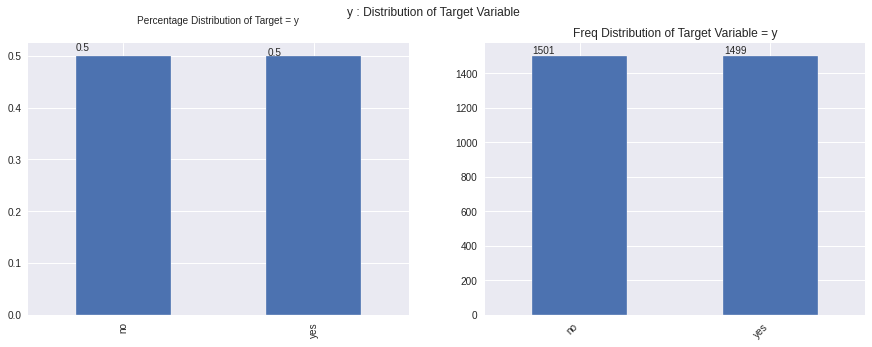

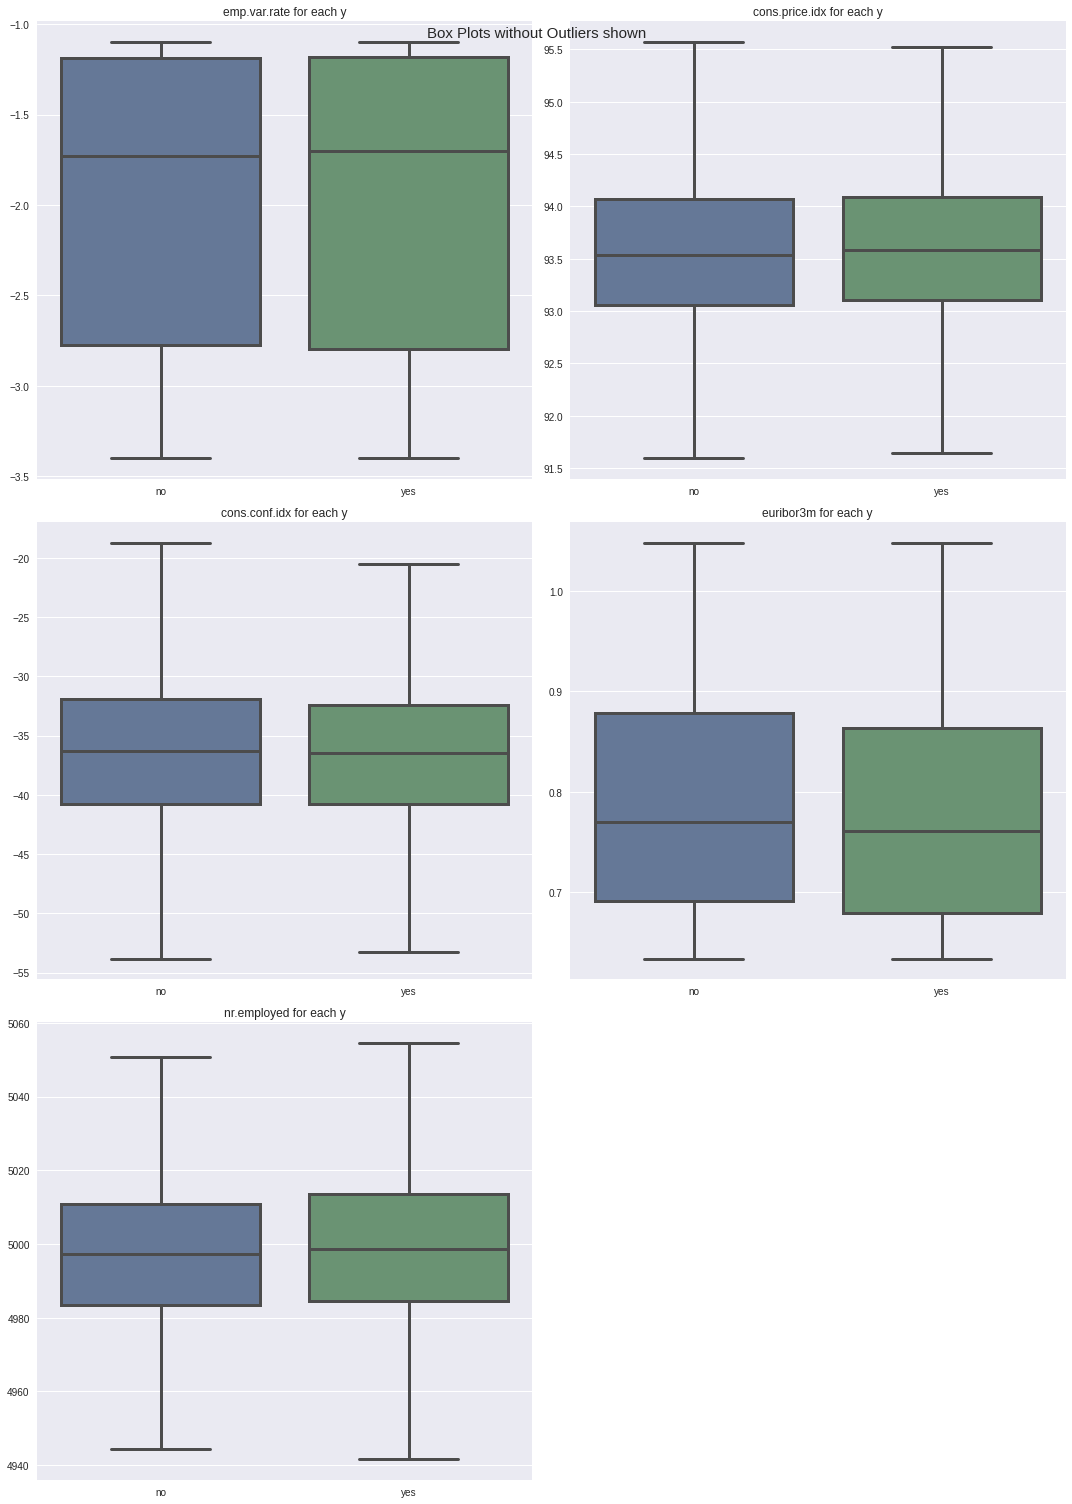

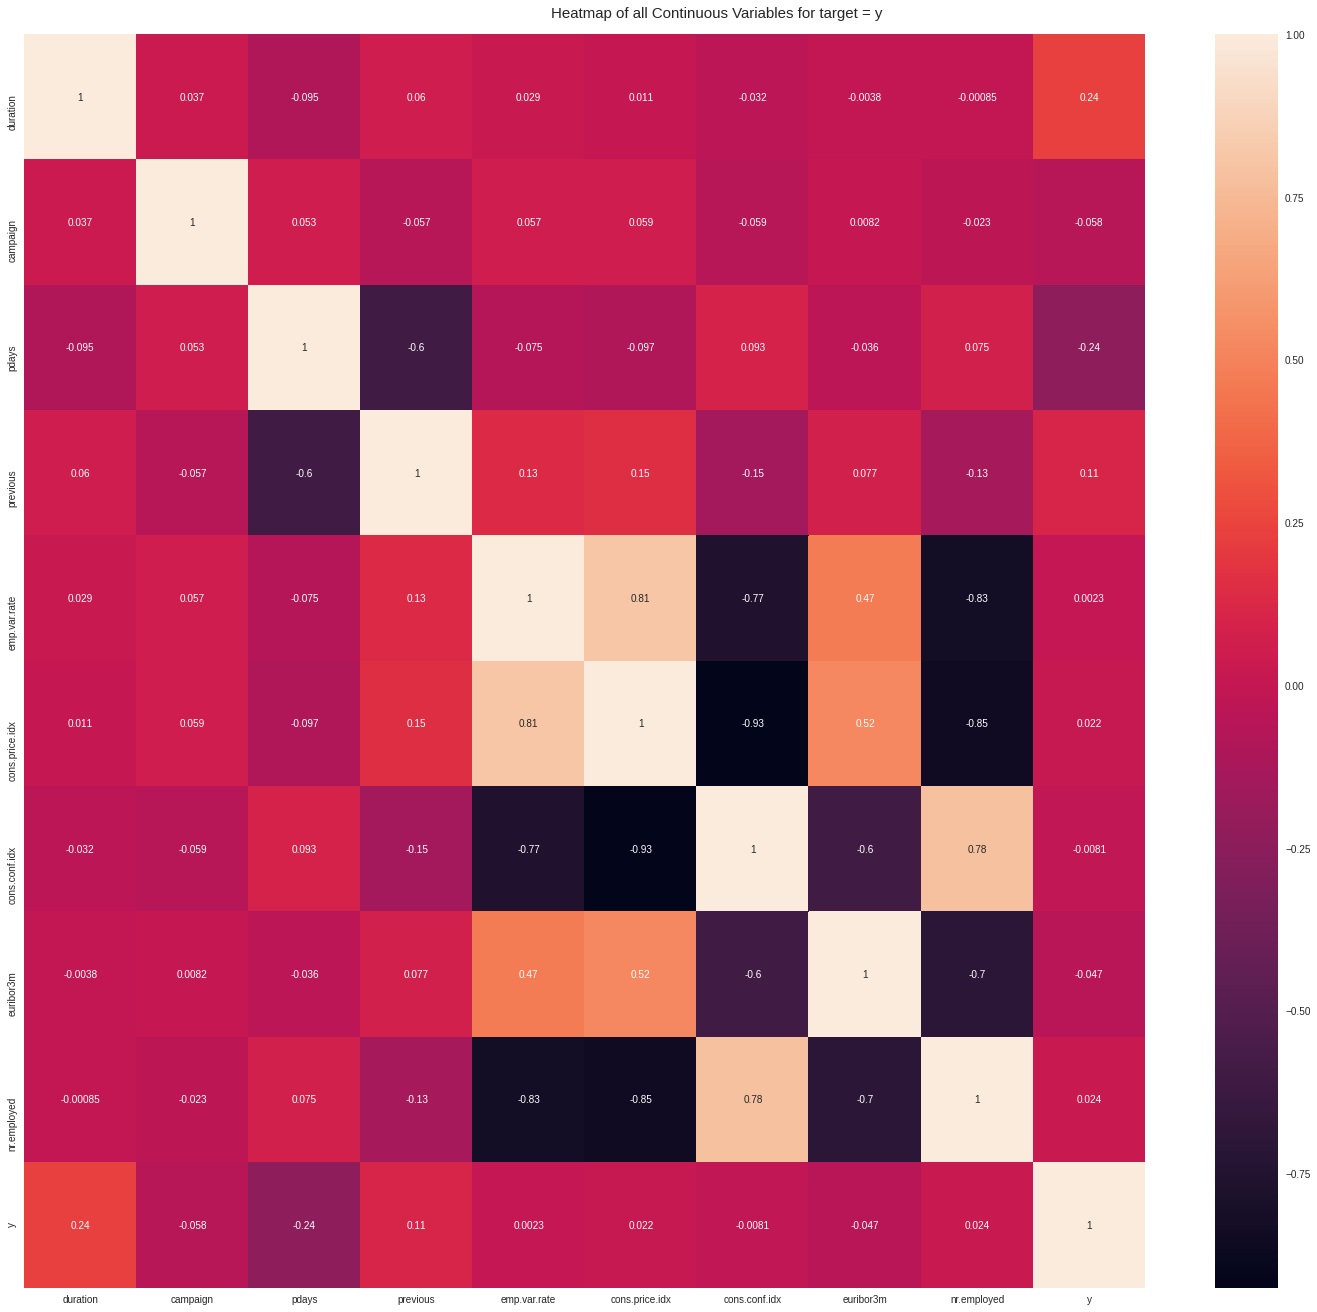

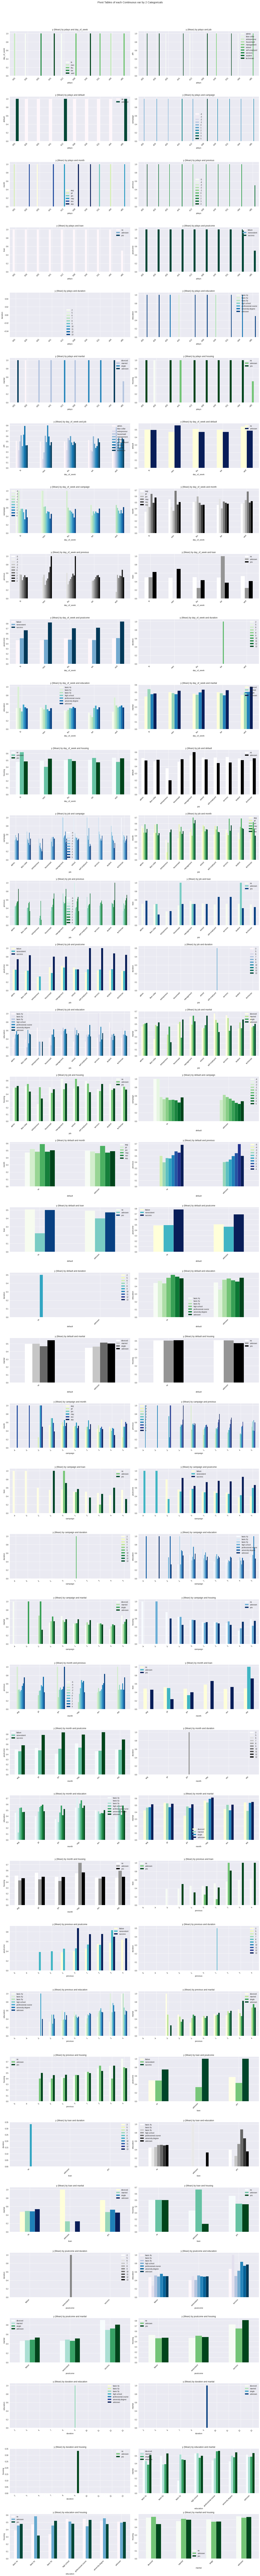

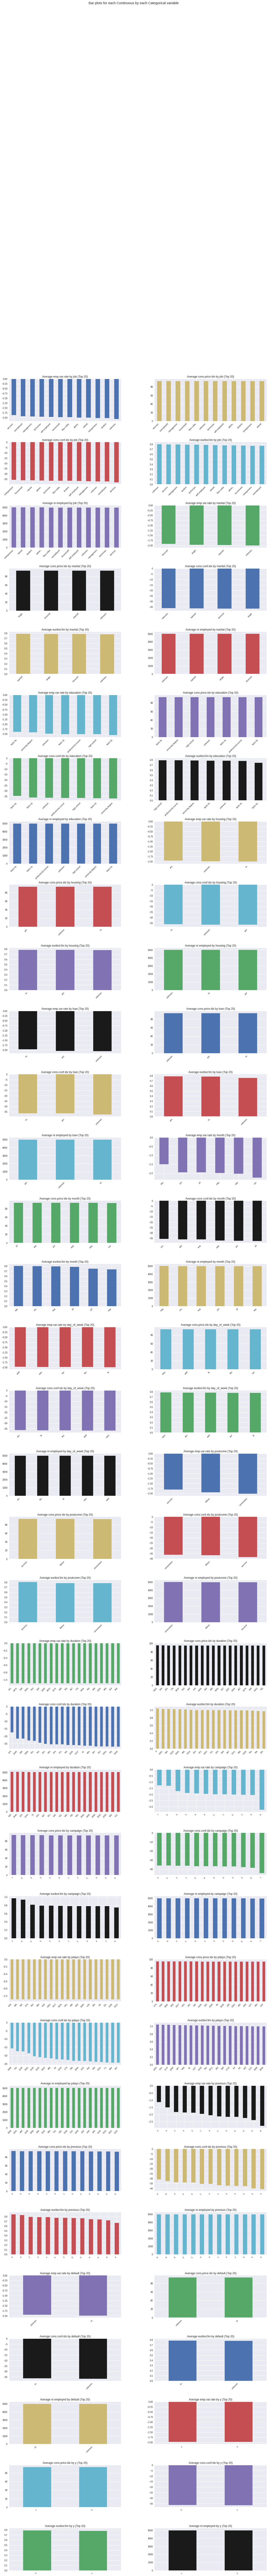

Time to run AutoViz (in seconds) = 59.682

 ###################### VISUALIZATION Completed ########################


In [10]:
data = AV.AutoViz('moro14_synth.csv',depVar='y')

Once the provided line of code loads the data, spend a (couple of) cells and Markdown blocks to explore the data. Report and discuss any interesting findings from the data. If there exist any concerns to be addressed, also discuss them accordingly.

[NOTE]: Please assume you only have the current dataset at hand, so do not assume prior distributional knowledge from the original bank telemarketing dataset.

Admin jobs are the ones which subscribes to the loan more and also the one which didnt default. What could be noted here is that there are outliers present for few columns and few columns are linearly correlated with each other. Rest dataset seems to be uniformly distributed.

In [11]:
import seaborn as sns

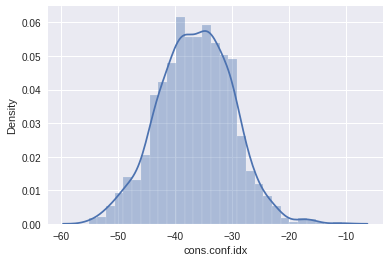

In [15]:
sns.distplot(df[df['y']=='no']['cons.conf.idx'])

In [ ]:
# Explore the dataset `df` and elaborate on your exploration.
# Feel free to use as many Markdown comment blocks and code blocks as you want, and feel free to add visualizations.

In [ ]:
import numpy as np

In [ ]:
categorical=['job','marital','education','default','housing','loan','campaign','previous','poutcome']

pd.get_dummies(df,drop_first=True,columns=categorical)

,age,contact,month,day_of_week,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown,default_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,campaign_-3,campaign_-2,campaign_-1,campaign_0,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,previous_-4,previous_-3,previous_-2,previous_-1,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_9,poutcome_nonexistent,poutcome_success
0,59,cellular,jul,thu,131,803,-1.847016,93.745716,-38.927050,0.754158,5005.286336,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,31,cellular,sep,thu,236,176,-1.100000,95.292459,-51.776320,1.032883,4937.510321,yes,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,40,cellular,may,thu,119,388,-2.298428,93.555591,-36.690548,0.676514,5012.806379,no,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,23,cellular,jul,tue,291,263,-1.121356,94.139250,-36.966172,0.723016,4982.975549,yes,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,34,cellular,nov,thu,464,262,-1.102507,94.907967,-51.647898,1.003647,4962.935669,yes,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,32,cellular,nov,thu,293,440,-3.096050,92.951523,-30.624944,0.752780,5008.812708,yes,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2996,26,cellular,nov,fri,328,621,-1.408416,93.838956,-41.508320,0.864022,4989.201105,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2997,unknown,cellular,jul,wed,242,520,-2.426813,93.334426,-32.115750,0.691465,5005.031496,yes,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2998,35,cellular,sep,fri,304,985,-1.135544,93.668432,-40.208758,0.775713,4980.468076,no,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In the next code cell, an empty function spec is given, for running pre-processing on the data before further classification will be performed. Please complete the function with any pre-processing steps you would like to take, and explain the details.

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,59,management,married,basic.4y,no,yes,no,cellular,jul,thu,131,2,803,1,failure,-1.847016,93.745716,-38.927050,0.754158,5005.286336,no
1,31,retired,single,unknown,unknown,yes,no,cellular,sep,thu,236,1,176,1,nonexistent,-1.100000,95.292459,-51.776320,1.032883,4937.510321,yes
2,40,technician,married,unknown,no,no,no,cellular,may,thu,119,2,388,0,failure,-2.298428,93.555591,-36.690548,0.676514,5012.806379,no
3,23,technician,unknown,high.school,no,no,no,cellular,jul,tue,291,1,263,1,nonexistent,-1.121356,94.139250,-36.966172,0.723016,4982.975549,yes
4,34,admin.,single,university.degree,no,no,no,cellular,nov,thu,464,4,262,3,failure,-1.102507,94.907967,-51.647898,1.003647,4962.935669,yes


In [ ]:
df.nunique()

age                 99
job                 12
marital              4
education            7
default              2
housing              3
loan                 3
contact              1
month                6
day_of_week          5
duration           838
campaign            12
pdays             1467
previous            13
poutcome             3
emp.var.rate      3000
cons.price.idx    3000
cons.conf.idx     3000
euribor3m         3000
nr.employed       3000
y                    2
dtype: int64

For preprocessing we do cyclic encoding filling missing values, label encoding and one hot encoding.

In [16]:
from typing import Tuple

def pre_processing(df_: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    """Pre-processing step for classification task
    
    This function takes the data frame loaded from above and returns 
    a tuple of the NumPy array. The tuple's first element is the independent variables,
    or feature vectors, having a shape of (N, d) where N is the number of observations 
    and d is the number of variables (or columns). The tuple's second element is that
    the vector represents the dependent variable or label with the shape in (N,).
    
    Finalize this function to pre-process the data frame to be fit in the output spec.
    Beyond the mechanical conversion between input data-type and output data-type,
    apply any content-wise pre-processing that is necessary.

    """
    df=df_.copy(deep=True)
    categorical=['job','marital','education','default','housing','loan','poutcome']
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    dropcols = [column for column in upper.columns if any(upper[column] > 0.7)]
    dropcols=dropcols+['contact']
    day={'thu':3,'tue':1,'wed':2,'mon':0,'fri':4}
    df['day_of_week']=df['day_of_week'].map(day)
    month={'may':1,'jun':2,'jul':3,'aug':4,'sep':5,'nov':6}
    df['month']=df['month'].map(month)
    df['week_sin'] = np.sin((df.day_of_week)*(2.*np.pi/5))
    df['wee_cos'] = np.cos((df.day_of_week)*(2.*np.pi/5))
    df['age'] = df['age'].apply(lambda x: x.replace('unknown','39'))

    #str(df[df['age']!='unknown']['age'].astype(int).median()))
    df['age']=df['age'].astype(int)
    df.drop(columns=dropcols,axis=1,inplace=True)
    df=pd.get_dummies(df,drop_first=True,columns=categorical)

    return df.drop('y',axis=1).values,df['y'].map({'no':0,'yes':1}).values,df.drop('y',axis=1).columns

In [17]:
# simple ``execution`` lines
X, y ,columns= pre_processing(df)

## Task 2: Classification & Model Selection

We now will proceed to the training-model selection steps of the classification task. In particular, we consider a range of classification models:

- Gaussian Naive Bayes Classifier
- Logistic Regression
- Quadratic Discriminant Analysis
- Decision Tree Classifier

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

clfs = {
    'LR': LogisticRegression(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'GNB': GaussianNB(),
    'DT': DecisionTreeClassifier()
}

We are interested in selecting the better model from these candidates through a cross-validation procedure.

We provide some basic code below, but this code is (deliberately) problematic. Please improve the procedure; feel free to fully modify the cells, and to include any further intermediate processing steps you find necessary.

Furthermore, we have not said anything about evaluation. Please propose and implement a proper evaluation procedure, such that a model can be selected.

In [20]:
X.shape

(3000, 38)

Anova based basic feature selection.

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X_new = SelectKBest(f_classif, k=20).fit_transform(X, y)
X_new.shape

(3000, 20)

In [51]:
n_samples, n_features = X.shape

# split the dataset into train / test
rnd_idx = np.random.permutation(n_samples)
bound = int(n_samples / 5)
newbound=n_samples-bound
x_train = X[rnd_idx[:newbound]]
y_train = y[rnd_idx[:newbound]]
x_test = X[rnd_idx[newbound:]]
y_test = y[rnd_idx[newbound:]]

In [ ]:
import seaborn as sns

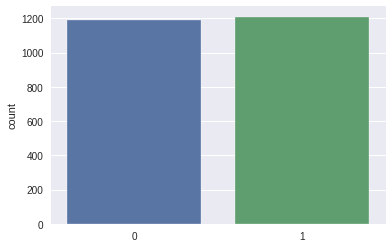

In [24]:
sns.countplot(y_train)

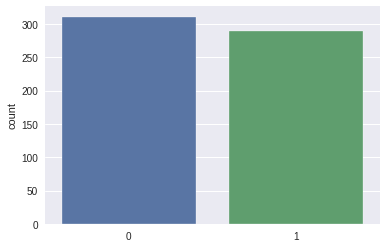

In [25]:
sns.countplot(y_test)

In [29]:
import copy

In [ ]:
from sklearn.metrics import precision_score,recall_score

In [31]:
from sklearn.metrics import classification_report

In [ ]:
len(clfs['DT'].predict(xtst))

600

In [27]:
from sklearn.preprocessing import StandardScaler

In [54]:
# here all classifiers are trained with the train dataset split
# [note] if there's warning or error, try to fix it or discuss it
sc=StandardScaler()
xtrn=copy.deepcopy(x_train)
xtst=copy.deepcopy(x_test)
sc.fit(xtrn)
xtrn=sc.transform(xtrn)
xtst=sc.transform(xtst)
for name, clf in clfs.items():
    clf.fit(xtrn, y_train)
    print(name,classification_report(y_test,clf.predict(xtst)))


LR               precision    recall  f1-score   support

           0       0.65      0.77      0.71       288
           1       0.75      0.62      0.68       312

    accuracy                           0.69       600
   macro avg       0.70      0.70      0.69       600
weighted avg       0.70      0.69      0.69       600

QDA               precision    recall  f1-score   support

           0       0.57      0.71      0.63       288
           1       0.65      0.50      0.57       312

    accuracy                           0.60       600
   macro avg       0.61      0.60      0.60       600
weighted avg       0.61      0.60      0.60       600

GNB               precision    recall  f1-score   support

           0       0.57      0.76      0.65       288
           1       0.68      0.46      0.55       312

    accuracy                           0.61       600
   macro avg       0.62      0.61      0.60       600
weighted avg       0.63      0.61      0.60       600

DT      

If we want to select 'the best model', considering the classifiers of interest above, how would you approach this?

Please implement and explain this below.

_Note: one can fine-tune models forever. We do not need The Definitive Final Answer from you; please be reasonable given the time and resources you have at hand. If there are any further improvements you can think of, but that you cannot feasibly demonstrate yet, explain what you are thinking of in text._

Or what we can do is take best of all the models and make a combined ensemble of all the models which produces better result for all the metrics.

In [55]:
from sklearn.ensemble import StackingClassifier
estimators = [
     ('LR', LogisticRegression()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('GNB', GaussianNB()),
    ('DT', DecisionTreeClassifier())]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(xtrn, y_train)
print('Ensemble',classification_report(y_test,(clf.predict_proba(xtst)>0.5)[:,1].astype(int)))

Ensemble               precision    recall  f1-score   support

           0       0.66      0.75      0.70       288
           1       0.74      0.64      0.68       312

    accuracy                           0.69       600
   macro avg       0.70      0.70      0.69       600
weighted avg       0.70      0.69      0.69       600



In [56]:
import matplotlib.pyplot as plt


In [57]:
from sklearn.metrics import roc_curve

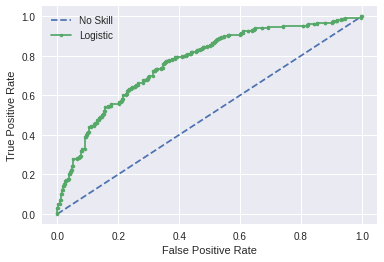

In [58]:
yhat = clf.predict_proba(xtst)
yhat = yhat[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

We can ofcourse change the threshold to over emphaisize some metric more than others.

For us here recall would make a bit more sense than precision.
After seeing all the metrics it seems like logistic regression would be a good choice since its F1 score which is a combined metric of precision and recall is good for both the classes. We can make this approach more robust by doing a k folds cross validation and then monitoring how robust are the prediction when test across different folds. 
In case where we would need to explain the results of our prediction decision tree serves to be great since we can visualise the decision tree and see why a certain decision was taken. We can also understand this somehow by observing the coefficients logitistic regression to have a vaugue idea about how important was a variable.
Although given models didnt have a lot of parameters to be tuned but it can be done well by bayesian optimisation well in case of limited resources.

### Discussion of evaluation results

Do your results reveal any irregular/unexpected/interesting behavior? Please elaborate in one or more cells below.

In [45]:
clf.final_estimator_.coef_

array([[ 5.2852665 , -0.75450733, -0.22838129,  0.05290205]])

Here we see in the case of ensemble also LR is given the most weight

In [59]:
pd.DataFrame(abs(clfs['DT'].feature_importances_.reshape(38)), columns, columns=['coef']).sort_values(by='coef', ascending=False)[:10]

,coef
duration,0.268131
pdays,0.123271
emp.var.rate,0.117457
euribor3m,0.097589
age,0.052218
month,0.043397
campaign,0.034472
previous,0.030503
week_sin,0.021006
wee_cos,0.014780


In [60]:
pd.DataFrame(abs(clfs['LR'].coef_.reshape(38)), columns, columns=['coef']).sort_values(by='coef', ascending=False)[:10]

,coef
duration,1.694785
pdays,0.514014
day_of_week,0.142309
euribor3m,0.126069
job_management,0.119827
marital_unknown,0.114409
education_unknown,0.110064
campaign,0.104658
education_university.degree,0.096989
wee_cos,0.094307


In [61]:
pd.DataFrame((clfs['LR'].coef_.reshape(38)), columns, columns=['coef']).sort_values(by='coef', ascending=False)[:10]

,coef
duration,1.694785
job_management,0.119827
marital_unknown,0.114409
education_unknown,0.110064
education_university.degree,0.096989
education_high.school,0.093251
education_professional.course,0.083930
poutcome_nonexistent,0.075792
age,0.048248
poutcome_success,0.039295


duration(directly proportional) and pdays (inversly proportional) seems to be most important variable which should be given more importance.